**Exercícios Rotulação de Componentes Conexos**
exercícios obtidos em http://homepages.inf.ed.ac.uk/rbf/HIPR2/label.htm


1. Implemente o algoritmo de rotulação de componentes conexos (algoritmo do slide ou por outra solução) e aplique sobre a imagem binária art8.png. Indique qual vizinhança será considerada (4 ou 8)
Mostre os resultados na forma da imagem art8lab1.png e art8lab2.png

art8.png: 
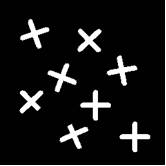
art8lab1.png: 
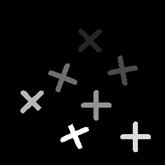
art8lab2.png: 
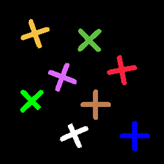
		

Using N_8.
defaultdict(<class 'list'>, {1.0: [2.0], 3.0: [5.0, 4.0], 5.0: [6.0], 6.0: [8.0], 7.0: [9.0, 13.0], 8.0: [11.0], 10.0: [12.0], 2.0: [11.0, 14.0], 12.0: [13.0], 14.0: [15.0], 15.0: [16.0], 16.0: [17.0], 17.0: [18.0], 9.0: [19.0], 19.0: [20.0], 21.0: [22.0], 23.0: [24.0, 33.0], 24.0: [25.0], 26.0: [27.0], 27.0: [28.0], 22.0: [28.0, 29.0], 29.0: [30.0], 30.0: [31.0], 31.0: [34.0], 32.0: [35.0, 33.0], 34.0: [36.0], 37.0: [40.0], 38.0: [41.0, 43.0], 39.0: [42.0], 42.0: [43.0], 40.0: [44.0], 44.0: [45.0], 46.0: [47.0], 48.0: [49.0], 49.0: [50.0], 50.0: [51.0, 58.0], 52.0: [54.0, 53.0], 54.0: [55.0], 55.0: [56.0], 56.0: [57.0], 57.0: [58.0], 51.0: [59.0], 59.0: [60.0], 47.0: [61.0], 60.0: [62.0], 61.0: [63.0], 62.0: [64.0], 64.0: [65.0], 65.0: [66.0], 66.0: [67.0]})
defaultdict(<class 'list'>, {1.0: [2.0, 11.0, 14.0, 15.0, 16.0, 17.0, 18.0], 3.0: [5.0, 4.0, 6.0, 8.0, 11.0], 5.0: [6.0, 8.0, 11.0], 6.0: [8.0, 11.0], 7.0: [9.0, 13.0, 19.0, 20.0], 8.0: [11.0], 10.0: [12.0, 13.0], 2.0: 

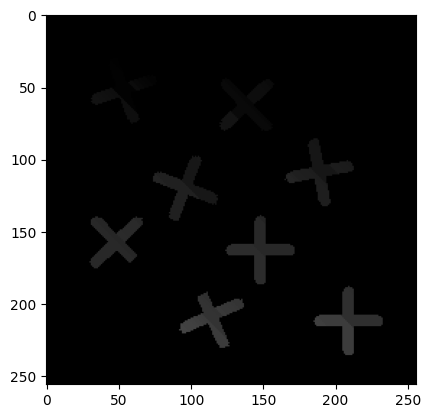

In [66]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from copy import deepcopy

def component_labeling(img):
    lines, columns = img.shape
    
    print("Using N_8.")
    
    modifiers = [(-1,-1),(-1,0),(-1,1),(0,-1)] # The index of the neighborhood pixels that should be verified.
    
    labels = np.zeros((lines, columns))
    equivalences_set = set() # Ensures no duplicate entries are added to the dict
    equivalences = defaultdict(list)
    
    next_label = 1
    for i in range(lines):
        for j in range(columns):
            if img[i][j] == 1: # Black (ignore).
                continue 
            
            for (modifier_i, modifier_j) in modifiers:
                try:
                    neighbor_label = labels[i + modifier_i][j + modifier_j]
                    if neighbor_label != 0: # Labelled neighbor
                        if labels[i][j] == 0:
                            labels[i][j] = neighbor_label # Receives the first label found.
                        elif labels[i][j] == neighbor_label:
                            continue
                        else:
                            smaller = min(labels[i][j], neighbor_label)
                            bigger = max(labels[i][j], neighbor_label)
                            
                            if (smaller, bigger) in equivalences_set:
                                    continue
                                
                            equivalences_set.add((smaller, bigger))
                            equivalences[smaller].append(bigger)           
                except IndexError:
                    continue
                
            if labels[i][j] == 0: # The pixel hasn't been labelled.
                labels[i][j] = next_label # The next available label is assigned to it.
                next_label += 1

    final_equivalences = resolve_transitive_equivalences(equivalences)
    for i in range(lines):
        for j in range(columns):
            label = labels[i][j]
            if label == 0 and label in final_equivalences:
                labels[i][j] = final_equivalences[label]
                
    return labels


def resolve_transitive_equivalences(equivalences):
    pass


if __name__ == "__main__":
    img = cv2.imread("art8.png", cv2.IMREAD_GRAYSCALE)

    labelled_img = component_labeling(img)
    
    plt.imshow(labelled_img, cmap='gray', vmin=0, vmax=255)


2. Calcule o número de objetos da imagem clc3.png. Note que antes será necessário binarizar a imagem. Para isso, considere um limiar (*threshold*) de 67, isto é, valores acima de 67 na imagem original recebem zero, e os abaixo recebem 1 (o que resulta na imagem clc3thr1.png).

clc3.png
![clc3.png](clc3.png)
clc3thr1
![clc3thr1.png](clc3thr1.png)
clc3lab1
![clc3lab1.png](clc3lab1.png)
		

In [ ]:
# code here